In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# generators

train_ds = keras.utils.image_dataset_from_directory(

directory = '/content/drive/MyDrive/Dental Project Vspace/train',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(

directory = '/content/drive/MyDrive/Dental Project Vspace/test',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)

)

Found 299 files belonging to 2 classes.
Found 118 files belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Normalize

def process (image, label):

    image = tf.cast (image/255., tf.float32)

    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model



model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation= 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
10/10 [==============================] - 144s 5s/step - loss: 3.2271 - accuracy: 0.7157 - val_loss: 0.6493 - val_accuracy: 0.6441
Epoch 2/10
10/10 [==============================] - 2s 158ms/step - loss: 2.6280 - accuracy: 0.7759 - val_loss: 0.8635 - val_accuracy: 0.6610
Epoch 3/10
10/10 [==============================] - 2s 129ms/step - loss: 1.3735 - accuracy: 0.8328 - val_loss: 4.0550 - val_accuracy: 0.4746
Epoch 4/10
10/10 [==============================] - 2s 154ms/step - loss: 0.6826 - accuracy: 0.9164 - val_loss: 3.5493 - val_accuracy: 0.4746
Epoch 5/10
10/10 [==============================] - 3s 162ms/step - loss: 1.0551 - accuracy: 0.8796 - val_loss: 1.0610 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 2s 132ms/step - loss: 0.5219 - accuracy: 0.9030 - val_loss: 5.1923 - val_accuracy: 0.4746
Epoch 7/10
10/10 [==============================] - 2s 134ms/step - loss: 0.3518 - accuracy: 0.9398 - val_loss: 10.6469 - val_accuracy: 0.4746
Epoch 

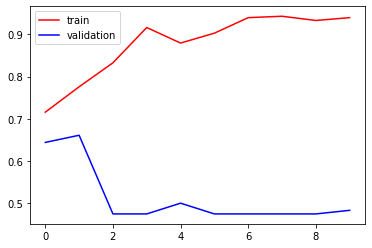

In [ ]:
# To see training results, plotting a graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()

plt.show()

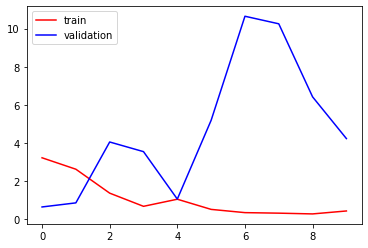

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/s20150630_115138_0000.bmp')

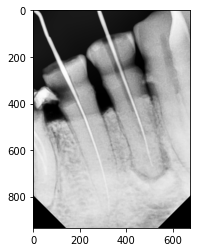

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(934, 676, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)